In [1]:
import pandas as pd
import numpy as np
import seaborn as sb

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn import preprocessing
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.manifold import TSNE
from sklearn.manifold import MDS
from sklearn.manifold import Isomap
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder

In [3]:
data = pd.read_csv("horse.csv")

In [4]:
data.shape

(299, 28)

In [5]:
data.head()

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,no,adult,530101,38.5,66.0,28.0,cool,reduced,NaN,more_3_sec,...,45.0,8.4,NaN,NaN,died,no,11300,0,0,no
1,yes,adult,534817,39.2,88.0,20.0,NaN,NaN,pale_cyanotic,less_3_sec,...,50.0,85.0,cloudy,2.0,euthanized,no,2208,0,0,no
2,no,adult,530334,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,...,33.0,6.7,NaN,NaN,lived,no,0,0,0,yes
3,yes,young,5290409,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,...,48.0,7.2,serosanguious,5.3,died,yes,2208,0,0,yes
4,no,adult,530255,37.3,104.0,35.0,NaN,NaN,dark_cyanotic,more_3_sec,...,74.0,7.4,NaN,NaN,died,no,4300,0,0,no


In [6]:
data.tail()

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
294,yes,adult,533886,NaN,120.0,70.0,cold,NaN,pale_cyanotic,more_3_sec,...,55.0,65.0,NaN,NaN,euthanized,no,3205,0,0,no
295,no,adult,527702,37.2,72.0,24.0,cool,increased,pale_cyanotic,more_3_sec,...,44.0,NaN,serosanguious,3.3,euthanized,yes,2208,0,0,yes
296,yes,adult,529386,37.5,72.0,30.0,cold,reduced,pale_cyanotic,less_3_sec,...,60.0,6.8,NaN,NaN,died,yes,3205,0,0,no
297,yes,adult,530612,36.5,100.0,24.0,cool,reduced,pale_pink,less_3_sec,...,50.0,6.0,serosanguious,3.4,lived,yes,2208,0,0,yes
298,yes,adult,534618,37.2,40.0,20.0,NaN,NaN,NaN,NaN,...,36.0,62.0,clear,1.0,euthanized,no,6112,0,0,no


In [7]:
data.shape
#rows, columns

(299, 28)

In [8]:
data.describe()

,hospital_number,rectal_temp,pulse,respiratory_rate,nasogastric_reflux_ph,packed_cell_volume,total_protein,abdomo_protein,lesion_1,lesion_2,lesion_3
count,2.990000e+02,239.000000,275.000000,241.000000,53.000000,270.000000,266.000000,101.000000,299.000000,299.000000,299.000000
mean,1.087733e+06,38.168619,72.000000,30.460581,4.707547,46.307407,24.274436,3.039604,3659.709030,90.528428,7.387960
std,1.532032e+06,0.733744,28.646219,17.666102,1.982311,10.436743,27.364194,1.967947,5408.472421,650.637139,127.749768
min,5.184760e+05,35.400000,30.000000,8.000000,1.000000,23.000000,3.300000,0.100000,0.000000,0.000000,0.000000
25%,5.289040e+05,37.800000,48.000000,18.000000,3.000000,38.000000,6.500000,2.000000,2111.500000,0.000000,0.000000
50%,5.303010e+05,38.200000,64.000000,25.000000,5.000000,45.000000,7.500000,2.300000,2322.000000,0.000000,0.000000
75%,5.347360e+05,38.500000,88.000000,36.000000,6.500000,52.000000,56.750000,3.900000,3209.000000,0.000000,0.000000
max,5.305629e+06,40.800000,184.000000,96.000000,7.500000,75.000000,89.000000,10.100000,41110.000000,7111.000000,2209.000000


In [9]:
# trying to understand the features
data.columns

Index(['surgery', 'age', 'hospital_number', 'rectal_temp', 'pulse',
       'respiratory_rate', 'temp_of_extremities', 'peripheral_pulse',
       'mucous_membrane', 'capillary_refill_time', 'pain', 'peristalsis',
       'abdominal_distention', 'nasogastric_tube', 'nasogastric_reflux',
       'nasogastric_reflux_ph', 'rectal_exam_feces', 'abdomen',
       'packed_cell_volume', 'total_protein', 'abdomo_appearance',
       'abdomo_protein', 'outcome', 'surgical_lesion', 'lesion_1', 'lesion_2',
       'lesion_3', 'cp_data'],
      dtype='object')

In [10]:
data.nunique()
#number of unique values for each attribute

surgery                    2
age                        2
hospital_number          283
rectal_temp               40
pulse                     52
respiratory_rate          40
temp_of_extremities        4
peripheral_pulse           4
mucous_membrane            6
capillary_refill_time      3
pain                       5
peristalsis                4
abdominal_distention       4
nasogastric_tube           3
nasogastric_reflux         3
nasogastric_reflux_ph     20
rectal_exam_feces          4
abdomen                    5
packed_cell_volume        50
total_protein             80
abdomo_appearance          3
abdomo_protein            37
outcome                    3
surgical_lesion            2
lesion_1                  61
lesion_2                   6
lesion_3                   2
cp_data                    2
dtype: int64

In [11]:
# lets see as to how clean is the dataset
data.isnull().sum()

surgery                    0
age                        0
hospital_number            0
rectal_temp               60
pulse                     24
respiratory_rate          58
temp_of_extremities       56
peripheral_pulse          69
mucous_membrane           47
capillary_refill_time     32
pain                      55
peristalsis               44
abdominal_distention      56
nasogastric_tube         104
nasogastric_reflux       106
nasogastric_reflux_ph    246
rectal_exam_feces        102
abdomen                  118
packed_cell_volume        29
total_protein             33
abdomo_appearance        165
abdomo_protein           198
outcome                    0
surgical_lesion            0
lesion_1                   0
lesion_2                   0
lesion_3                   0
cp_data                    0
dtype: int64

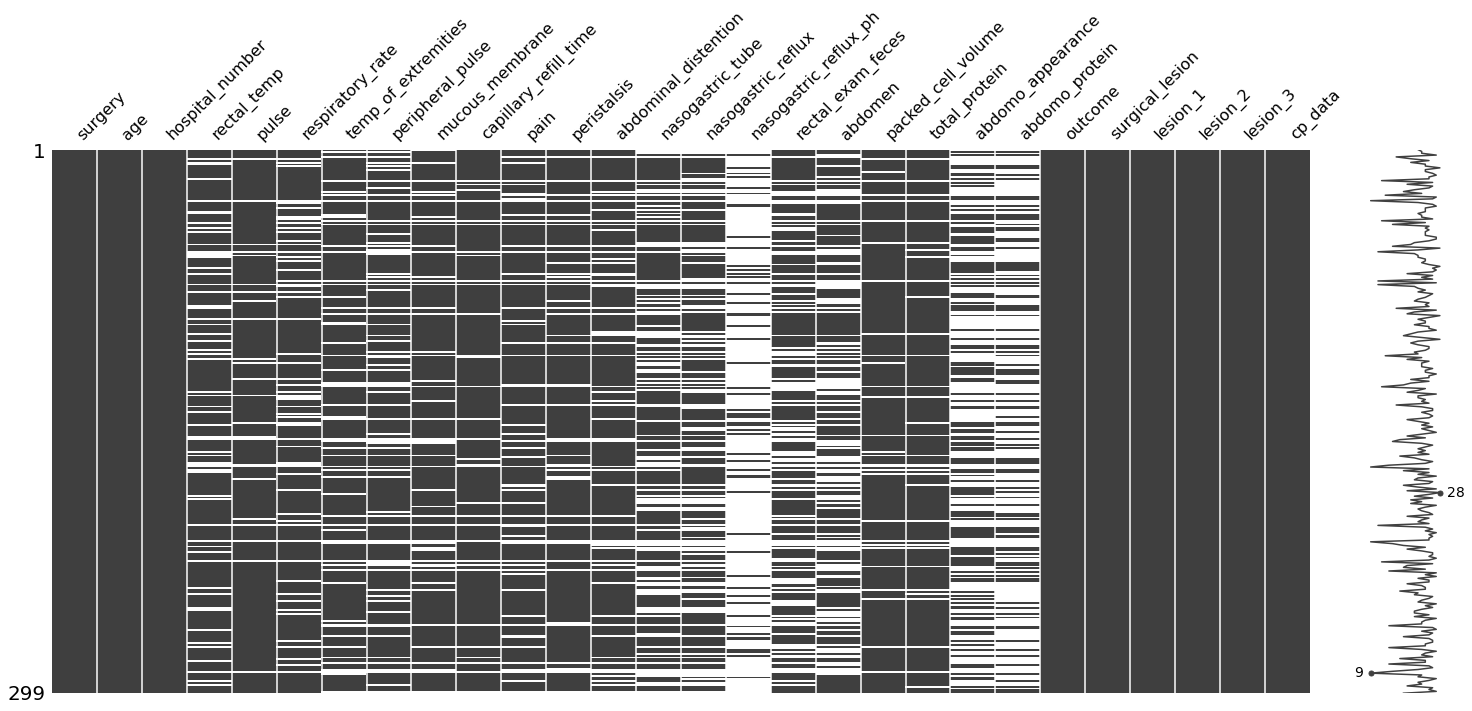

In [12]:
import missingno as msno
msno.matrix(data)

In [13]:
data.columns

Index(['surgery', 'age', 'hospital_number', 'rectal_temp', 'pulse',
       'respiratory_rate', 'temp_of_extremities', 'peripheral_pulse',
       'mucous_membrane', 'capillary_refill_time', 'pain', 'peristalsis',
       'abdominal_distention', 'nasogastric_tube', 'nasogastric_reflux',
       'nasogastric_reflux_ph', 'rectal_exam_feces', 'abdomen',
       'packed_cell_volume', 'total_protein', 'abdomo_appearance',
       'abdomo_protein', 'outcome', 'surgical_lesion', 'lesion_1', 'lesion_2',
       'lesion_3', 'cp_data'],
      dtype='object')

In [14]:
data.drop('hospital_number',axis=1,inplace=True)

In [15]:
data.drop('cp_data',axis=1,inplace=True)

In [16]:
#The features lesion1, 2 and 3 will give us trouble because the way they are formated doesn't make any sense. 
#Therefore, we will create a new feature that counts the number of lesions the horse has to replace them.
data.loc[data['lesion_1'] > 0, 'lesion_1'] = 1
data.loc[data['lesion_2'] > 0, 'lesion_2'] = 1
data.loc[data['lesion_3'] > 0, 'lesion_3'] = 1

data['num_lesions'] = data['lesion_1'] + data['lesion_2'] + data['lesion_3']
data = data.drop(columns = ['lesion_1','lesion_2', 'lesion_3'], axis = 1)
data['num_lesions'].value_counts()

1    236
0     56
2      6
3      1
Name: num_lesions, dtype: int64

In [17]:
def new_punctuation(df): #This manual ordinal encoder was done looking at the documentation to ensure they follow the correct scale (for ex: more pain -> bigger number)
    df['surgery'] = df['surgery'].map({'yes':1,'no':2}).astype('float64')
    df['age'] = df['age'].map({'adult':1,'young':2}).astype('float64')
    df['temp_of_extremities'] = df['temp_of_extremities'].map({'normal':1,'warm':2,'cool':3,'cold':4}).astype('float64')
    df['peripheral_pulse'] = df['peripheral_pulse'].map({'increased':2,'normal':1,'reduced':3,'absent':4}).astype('float64')
    df['mucous_membrane'] = df['mucous_membrane'].map({'dark_cyanotic':6,'bright_red':5,'pale_cyanotic':4,'pale_pink':3,'bright_pink':2,'normal_pink':1}).astype('float64')
    df['capillary_refill_time'] = df['capillary_refill_time'].map({'more_3_sec':3, '3':2, 'less_3_sec':1}).astype('float64')
    df['pain'] = df['pain'].map({'extreme_pain':5, 'severe_pain':4, 'mild_pain':3, 'depressed':2, 'alert':1}).astype('float64')
    df['peristalsis'] = df['peristalsis'].map({'absent':4, 'hypomotile':3, 'normal':2, 'hypermotile':1}).astype('float64')
    df['abdominal_distention'] = df['abdominal_distention'].map({'severe':4,'moderate':3,'slight':2,'none':1}).astype('float64')
    df['nasogastric_tube'] = df['nasogastric_tube'].map({'significant':3, 'slight':2, 'none':1}).astype('float64')
    df['nasogastric_reflux'] = df['nasogastric_reflux'].map({'more_1_liter':3, 'less_1_liter':2, 'none':0}).astype('float64')
    df['rectal_exam_feces'] = df['rectal_exam_feces'].map({'absent':4, 'decreased':3, 'increased':2, 'normal':1}).astype('float64')
    df['abdomen'] = df['abdomen'].map({'distend_large':5, 'distend_small':4, 'firm':3, 'other':2, 'normal':1}).astype('float64')
    df['abdomo_appearance'] = df['abdomo_appearance'].map({'serosanguious':3, 'cloudy':2, 'clear':1}).astype('float64')
    df['outcome'] = df['outcome'].map({'euthanized':3, 'died':2, 'lived':1}).astype('float64')
    df['surgical_lesion'] = df['surgical_lesion'].map({'yes':1,'no':0}).astype('float64')
    return df

In [18]:
data = new_punctuation(data)

# Visualizaing the Dataset

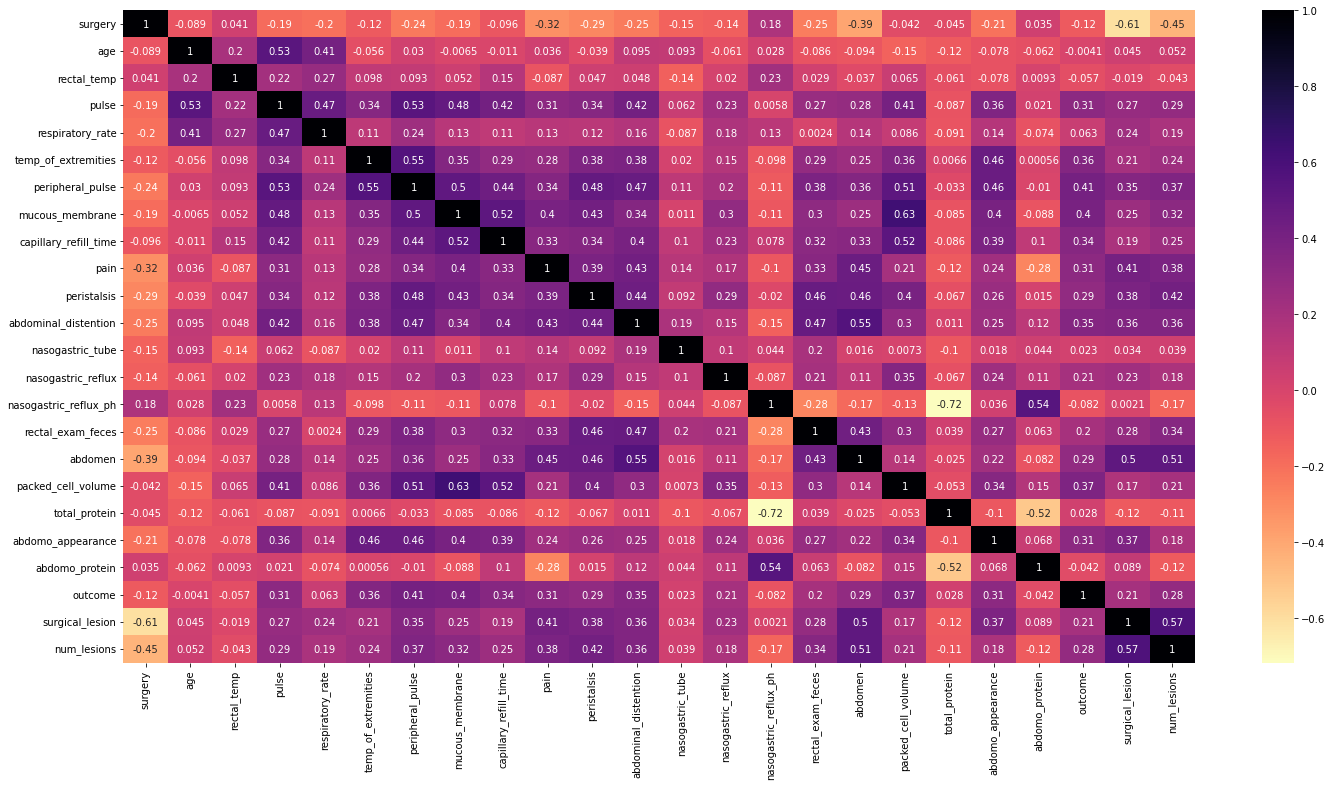

In [19]:
plt.figure(figsize=(24,12))
sns.heatmap(data.corr(),cmap='magma_r',annot=True)

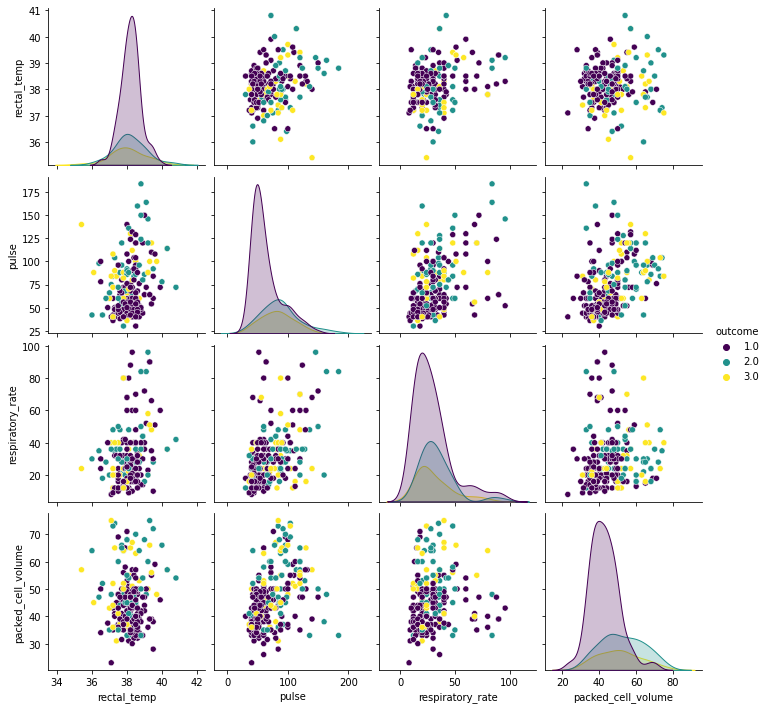

In [20]:
#We can see a clear correlation for example with high packed cell volume meaning no survival (the same with pulse not with resprate)
chosen_cols = ['rectal_temp', 'pulse', 'respiratory_rate', 'packed_cell_volume', 'outcome']
sns.pairplot(data[chosen_cols], hue='outcome', palette = 'viridis'); 

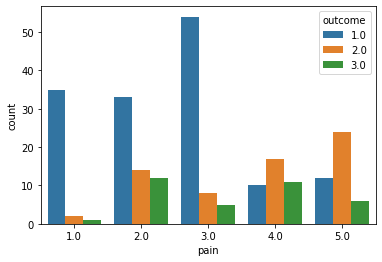

In [21]:
#We can see how the more  the pain, the less the chance of survival
sns.countplot(data=data, x='pain', hue = 'outcome')

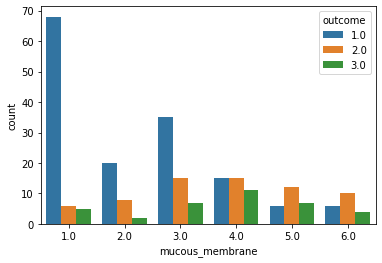

In [22]:
#We can see how the worse the circulation-> less the chance of survival
sns.countplot(data=data, x='mucous_membrane', hue = 'outcome') 

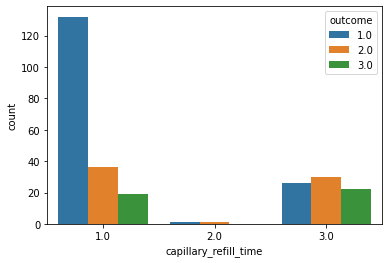

In [23]:
#We can see how the worse the circulation-> less the chance of survival
sns.countplot(data=data, x='capillary_refill_time', hue = 'outcome')

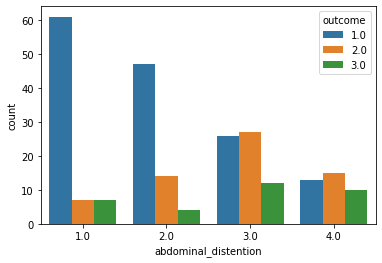

In [24]:
#the more distended the abdomen the lesser the chance of survival (it means more pain like the documentation says)
sns.countplot(data=data, x='abdominal_distention', hue = 'outcome') 

# Filling up missing values

In [25]:
data.isna().sum() 

surgery                    0
age                        0
rectal_temp               60
pulse                     24
respiratory_rate          58
temp_of_extremities       56
peripheral_pulse          69
mucous_membrane           47
capillary_refill_time     32
pain                      55
peristalsis               44
abdominal_distention      56
nasogastric_tube         104
nasogastric_reflux       106
nasogastric_reflux_ph    246
rectal_exam_feces        102
abdomen                  118
packed_cell_volume        29
total_protein             33
abdomo_appearance        165
abdomo_protein           198
outcome                    0
surgical_lesion            0
num_lesions                0
dtype: int64

In [26]:
#We start finding which columns to eliminate
for col in data.columns:
  if data[col].isna().sum() > 120: #More than 50% missing values
    print('Column ' + col + ' --> NULL VALUES: ' + str(data[col].isna().sum()) + ' --> Correlation with target of ' + str(data.corr()['outcome'][col]))

Column nasogastric_reflux_ph --> NULL VALUES: 246 --> Correlation with target of -0.08201647278598738
Column abdomo_appearance --> NULL VALUES: 165 --> Correlation with target of 0.3116557976470585
Column abdomo_protein --> NULL VALUES: 198 --> Correlation with target of -0.041550771048677076


In [27]:
#We drop columns nasogastric_reflux_ph and abdomo_protein as they don't hold a significant correlation with the target 
# and they have > 50% of null values in the train dataset
#Filling their null values would cause more harm than good
data = data.drop(columns = ['abdomo_protein', 'nasogastric_reflux_ph'], axis = 1)

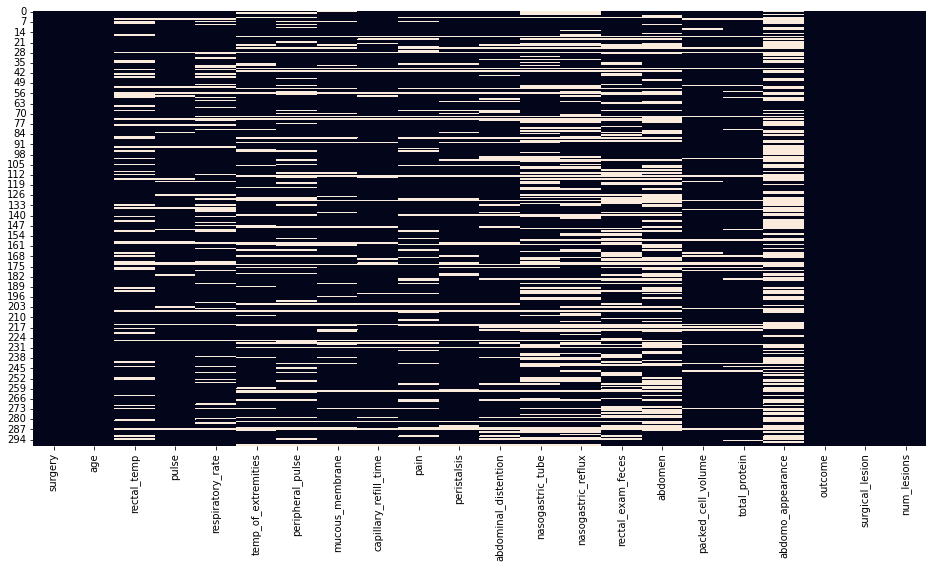

In [28]:
plt.figure(figsize=(16,8))
sns.heatmap(data.isnull(), cbar=False)

In [29]:
#We create vectors for the categorical and the numerical features that have missing values
cat_features = ['surgery' , 'age', 'temp_of_extremities', 'peripheral_pulse',
       'mucous_membrane', 'capillary_refill_time', 'pain', 'peristalsis',
       'abdominal_distention', 'nasogastric_tube', 'nasogastric_reflux', 
       'rectal_exam_feces', 'abdomen', 'abdomo_appearance']
       
num_features = ['rectal_temp', 'pulse', 'respiratory_rate', 'packed_cell_volume', 'total_protein']

In [30]:
#We will use a KNNImputer to imput the categorical features
dfTestOrig = data
KNNimpTR = KNNImputer(n_neighbors=3)
data = pd.DataFrame(KNNimpTR.fit_transform(data),columns = data.columns)

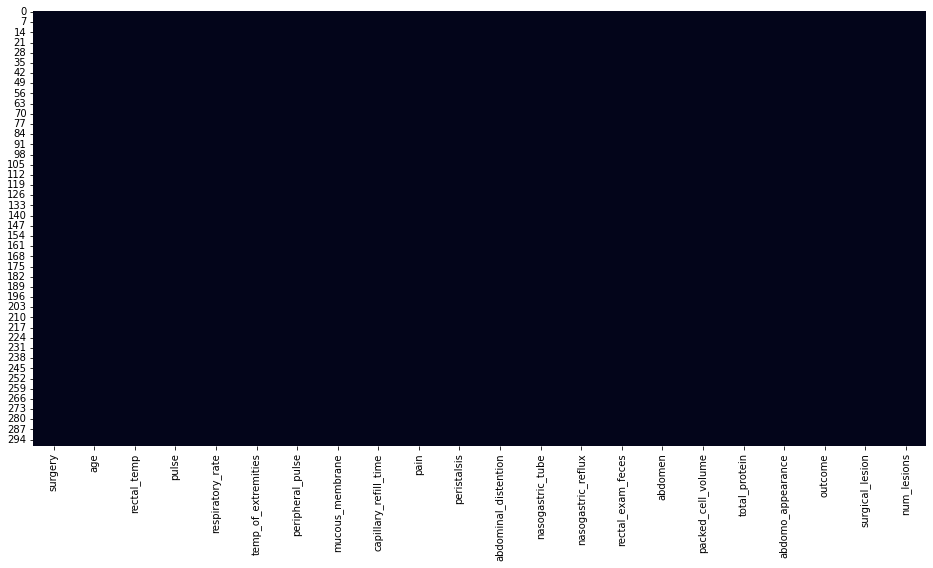

In [31]:
plt.figure(figsize=(16,8))
sns.heatmap(data.isnull(), cbar=False) 

In [32]:
data.isna().sum()

surgery                  0
age                      0
rectal_temp              0
pulse                    0
respiratory_rate         0
temp_of_extremities      0
peripheral_pulse         0
mucous_membrane          0
capillary_refill_time    0
pain                     0
peristalsis              0
abdominal_distention     0
nasogastric_tube         0
nasogastric_reflux       0
rectal_exam_feces        0
abdomen                  0
packed_cell_volume       0
total_protein            0
abdomo_appearance        0
outcome                  0
surgical_lesion          0
num_lesions              0
dtype: int64

In [33]:
# therfore cleaning completed

# Outlier detection & Elimination

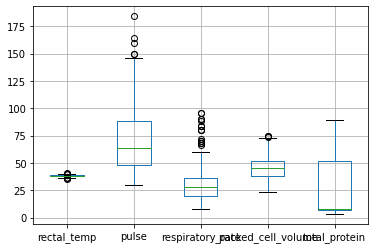

In [34]:
data[num_features].boxplot()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


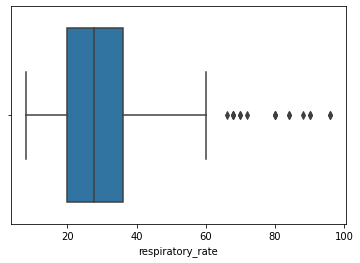

In [35]:
sns.boxplot(data['respiratory_rate'])

In [36]:
Q1 = data['respiratory_rate'].quantile(0.15)
Q3 = data['respiratory_rate'].quantile(0.85)
IQR = Q3 - Q1
big_outliers = data['respiratory_rate'] > (Q3 + 1.5 * IQR)
data[big_outliers] #keeping track of the outliers; lets eliminate them later

,surgery,age,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,...,nasogastric_tube,nasogastric_reflux,rectal_exam_feces,abdomen,packed_cell_volume,total_protein,abdomo_appearance,outcome,surgical_lesion,num_lesions
3,1.0,2.0,39.1,164.0,84.0,4.000000,1.000000,6.0,3.000000,2.000000,...,1.000000,2.000000,3.000000,4.333333,48.000000,7.200000,3.000000,2.0,1.0,1.0
39,1.0,2.0,39.2,146.0,96.0,3.333333,3.000000,4.0,2.666667,4.666667,...,2.333333,2.333333,4.000000,4.666667,52.666667,5.566667,2.333333,2.0,1.0,1.0
106,1.0,1.0,38.3,52.0,96.0,1.333333,3.000000,3.0,1.000000,2.000000,...,1.000000,0.000000,1.000000,3.333333,43.000000,6.100000,1.666667,1.0,1.0,1.0
185,1.0,1.0,39.3,64.0,90.0,2.000000,3.000000,1.0,1.000000,3.333333,...,1.000000,2.000000,2.666667,4.333333,39.000000,6.700000,1.666667,1.0,1.0,1.0
243,1.0,2.0,38.2,124.0,88.0,1.000000,3.000000,2.0,1.000000,2.000000,...,2.666667,1.666667,3.666667,4.333333,47.000000,8.000000,1.000000,1.0,1.0,1.0
254,1.0,2.0,38.8,184.0,84.0,1.000000,1.666667,1.0,1.000000,4.000000,...,2.000000,1.000000,2.000000,4.333333,33.000000,3.300000,1.666667,2.0,1.0,1.0
268,1.0,1.0,39.3,64.0,90.0,2.000000,3.000000,1.0,1.000000,3.333333,...,1.000000,2.000000,1.000000,5.000000,39.000000,6.700000,1.666667,1.0,1.0,1.0


In [37]:
data.drop(labels=data[big_outliers].index, axis=0, inplace = True)

In [38]:
Q1 = data['pulse'].quantile(0.25)
Q3 = data['pulse'].quantile(0.75)
IQR = Q3 - Q1
big_outliers_2 = data['pulse'] > (Q3 + 1.5 * IQR)
data[big_outliers_2]

,surgery,age,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,...,nasogastric_tube,nasogastric_reflux,rectal_exam_feces,abdomen,packed_cell_volume,total_protein,abdomo_appearance,outcome,surgical_lesion,num_lesions
41,2.0,2.0,39.0,150.0,72.0,2.666667,2.666667,4.333333,2.0,3.0,...,2.666667,1.666667,3.666667,4.333333,47.0,8.500000,1.666667,1.0,1.0,1.0
55,1.0,2.0,38.6,160.0,20.0,3.000000,2.666667,5.000000,1.0,3.0,...,3.000000,1.000000,4.000000,4.333333,38.0,6.066667,2.000000,2.0,1.0,1.0
274,1.0,2.0,38.8,150.0,50.0,1.000000,3.000000,6.000000,3.0,5.0,...,1.000000,0.000000,3.666667,4.333333,50.0,6.200000,1.666667,2.0,1.0,1.0


In [39]:
data.drop(labels=data[big_outliers_2].index, axis=0, inplace = True)

In [40]:
Q1 = data['respiratory_rate'].quantile(0.25)
Q3 = data['respiratory_rate'].quantile(0.75)
IQR = Q3 - Q1
big_outliers_3 = data['respiratory_rate'] > (Q3 + 1.5 * IQR)
data[big_outliers_3]

,surgery,age,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,...,nasogastric_tube,nasogastric_reflux,rectal_exam_feces,abdomen,packed_cell_volume,total_protein,abdomo_appearance,outcome,surgical_lesion,num_lesions
82,1.0,2.0,38.100000,100.0,80.0,3.000000,1.000000,2.000000,1.000000,3.000000,...,1.666667,1.0,1.000000,4.333333,36.0,5.7,1.333333,1.0,1.0,1.0
84,1.0,1.0,37.800000,60.0,80.0,1.000000,3.000000,2.000000,3.000000,2.000000,...,1.666667,2.0,4.000000,4.333333,40.0,4.5,2.000000,1.0,1.0,1.0
103,1.0,2.0,38.000000,140.0,68.0,1.000000,1.000000,1.000000,1.000000,3.000000,...,2.000000,1.0,2.000000,1.000000,39.0,5.3,1.666667,1.0,1.0,1.0
120,1.0,1.0,39.400000,54.0,66.0,1.000000,1.000000,2.000000,1.000000,2.000000,...,1.000000,0.0,3.000000,4.000000,39.0,6.0,2.000000,1.0,1.0,1.0
125,1.0,1.0,38.000000,42.0,68.0,4.000000,1.000000,1.000000,1.000000,3.000000,...,2.000000,2.0,4.000000,4.000000,41.0,7.6,2.000000,1.0,1.0,1.0
207,1.0,1.0,37.800000,88.0,80.0,3.000000,3.000000,5.000000,3.000000,3.666667,...,2.000000,3.0,4.000000,5.000000,64.0,89.0,1.666667,3.0,1.0,1.0
228,1.0,2.0,38.500000,120.0,70.0,2.333333,2.666667,4.333333,1.666667,3.333333,...,2.000000,0.0,1.000000,4.000000,35.0,54.0,1.000000,1.0,1.0,3.0
264,2.0,1.0,38.533333,56.0,68.0,3.000000,1.000000,1.000000,1.000000,3.000000,...,2.000000,0.0,1.000000,4.000000,40.0,6.0,1.666667,3.0,1.0,1.0
294,1.0,1.0,38.266667,120.0,70.0,4.000000,3.000000,4.000000,3.000000,2.000000,...,1.666667,0.0,3.333333,5.000000,55.0,65.0,2.666667,3.0,0.0,1.0


In [41]:
data.drop(labels=data[big_outliers_3].index, axis=0, inplace = True)

In [42]:
Q1 = data['respiratory_rate'].quantile(0.25)
Q3 = data['respiratory_rate'].quantile(0.75)
IQR = Q3 - Q1
big_outliers_3 = data['respiratory_rate'] > (Q3 + 1.5 * IQR)
data[big_outliers_3]

,surgery,age,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,...,nasogastric_tube,nasogastric_reflux,rectal_exam_feces,abdomen,packed_cell_volume,total_protein,abdomo_appearance,outcome,surgical_lesion,num_lesions
20,1.0,1.0,39.9,72.000000,60.000000,1.0,1.0,5.0,3.0,5.0,...,3.000000,0.000000,4.000000,4.000000,46.000000,6.100000,2.0,1.0,1.0,1.0
23,1.0,2.0,38.3,130.000000,60.000000,3.0,3.0,5.0,1.0,2.0,...,1.333333,1.000000,3.333333,4.333333,50.000000,70.000000,2.0,1.0,1.0,1.0
43,1.0,1.0,38.8,120.000000,59.333333,3.0,4.0,4.0,1.0,4.0,...,1.000000,0.000000,3.333333,5.000000,52.000000,67.000000,2.0,3.0,1.0,1.0
117,2.0,1.0,39.5,77.333333,60.000000,3.0,3.0,4.0,3.0,3.0,...,1.666667,3.000000,4.000000,5.000000,62.666667,6.700000,1.0,3.0,1.0,1.0
184,1.0,1.0,38.5,120.000000,60.000000,4.0,3.0,6.0,3.0,4.0,...,1.333333,1.000000,3.666667,5.000000,54.000000,26.066667,2.0,1.0,1.0,1.0
247,1.0,1.0,38.0,108.000000,60.000000,2.0,3.0,4.0,1.0,4.0,...,2.000000,1.333333,3.000000,4.000000,34.666667,24.466667,3.0,1.0,1.0,1.0


In [43]:
data.drop(labels=data[big_outliers_3].index, axis=0, inplace = True)

In [44]:
Q1 = data['rectal_temp'].quantile(0.25)
Q3 = data['rectal_temp'].quantile(0.75)
IQR = Q3 - Q1
big_outliers_4 = data['rectal_temp'] > (Q3 + 1.5 * IQR)
data[big_outliers_4]

,surgery,age,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,...,nasogastric_tube,nasogastric_reflux,rectal_exam_feces,abdomen,packed_cell_volume,total_protein,abdomo_appearance,outcome,surgical_lesion,num_lesions
54,2.0,1.0,40.3,114.0,36.000000,3.0,3.0,1.0,3.0,2.0,...,2.0,0.0,1.000000,5.000000,57.0,8.1,3.0,3.0,1.0,1.0
75,1.0,2.0,39.7,100.0,43.333333,3.0,3.0,5.0,3.0,2.0,...,2.0,0.0,3.666667,4.333333,48.0,57.0,2.0,3.0,1.0,1.0
91,2.0,1.0,40.3,114.0,36.000000,3.0,3.0,1.0,3.0,2.0,...,2.0,0.0,1.000000,5.000000,57.0,8.1,3.0,2.0,1.0,1.0
258,1.0,1.0,40.8,72.0,42.000000,3.0,3.0,1.0,1.0,2.0,...,2.0,0.0,3.666667,4.333333,54.0,7.4,3.0,2.0,1.0,1.0
280,2.0,1.0,40.0,78.0,29.333333,3.0,3.0,5.0,1.0,2.0,...,1.0,0.0,4.000000,1.000000,66.0,6.5,2.0,2.0,1.0,1.0


In [45]:
data.drop(labels=data[big_outliers_4].index, axis=0, inplace = True)

In [46]:
data.columns

Index(['surgery', 'age', 'rectal_temp', 'pulse', 'respiratory_rate',
       'temp_of_extremities', 'peripheral_pulse', 'mucous_membrane',
       'capillary_refill_time', 'pain', 'peristalsis', 'abdominal_distention',
       'nasogastric_tube', 'nasogastric_reflux', 'rectal_exam_feces',
       'abdomen', 'packed_cell_volume', 'total_protein', 'abdomo_appearance',
       'outcome', 'surgical_lesion', 'num_lesions'],
      dtype='object')

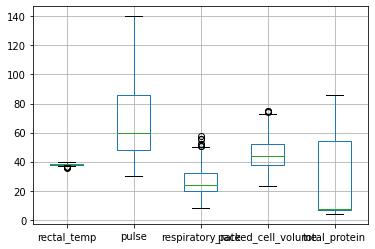

In [47]:
data[num_features].boxplot()

eliminated the outliers ^

# Normalizing the dataset to feed as input to the model

In [48]:
#We also standardize the categorical variables despite it isn't necessary
target = data['outcome']
data = data.drop(columns = ['outcome'], axis = 1) #We extract the target to avoid standardizing it
features = data.columns

scaler = StandardScaler()
scaled = scaler.fit_transform(data)

data = pd.DataFrame(data=scaled, columns=features)
#We rebuild to a dataframe format"""

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8b59ed72d0>,
      dtype=object)

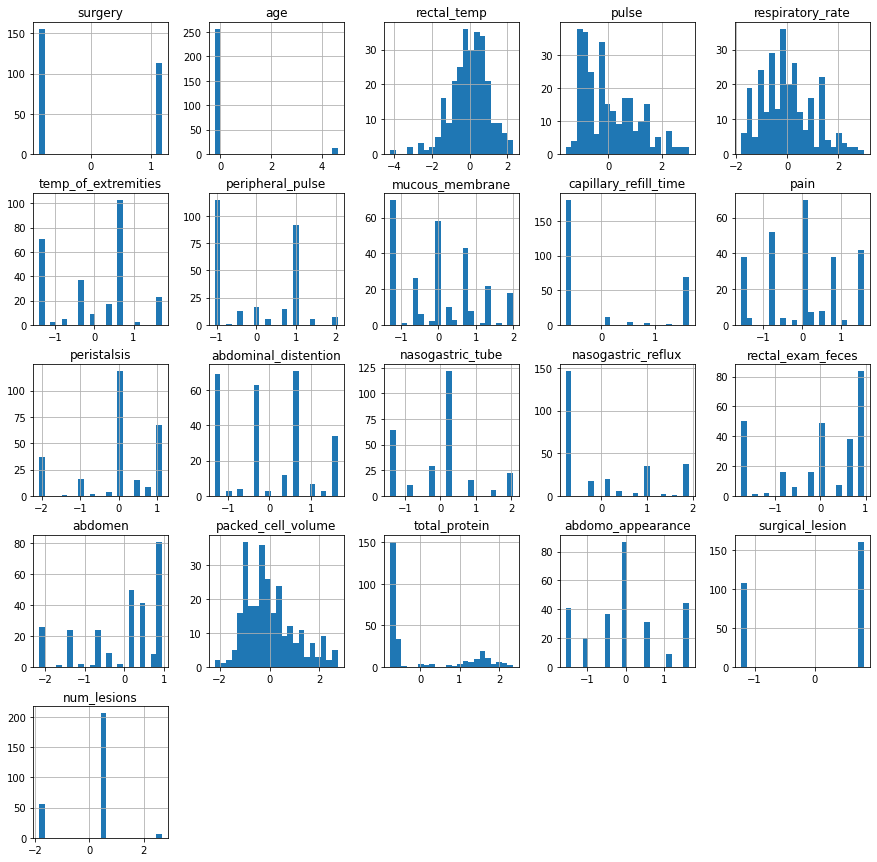

In [49]:
data.hist(bins=22, figsize=(15, 15))

In [50]:
#We will fix variables with a skewness > 0.5
print(data['pulse'].skew()) 
print(data['respiratory_rate'].skew())
print(data['total_protein'].skew())
print(data['packed_cell_volume'].skew())
print(data['rectal_temp'].skew())

0.7792633340558633
0.5652739879790166
1.0496719262289786
0.726933197575324
-0.5227842263871558


In [51]:
cols_not_normal = ['pulse', 'respiratory_rate', 'total_protein']

PT = PowerTransformer()

PT_data = PT.fit_transform(data)

dfTrain2 = pd.DataFrame(data=PT_data, columns=features)

data[cols_not_normal] = dfTrain2[cols_not_normal]

data.insert(21,"outcome",target.values) 
#we add the target feature again

After transformation: less skewed data:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8b5ad8ab10>,
      dtype=object)

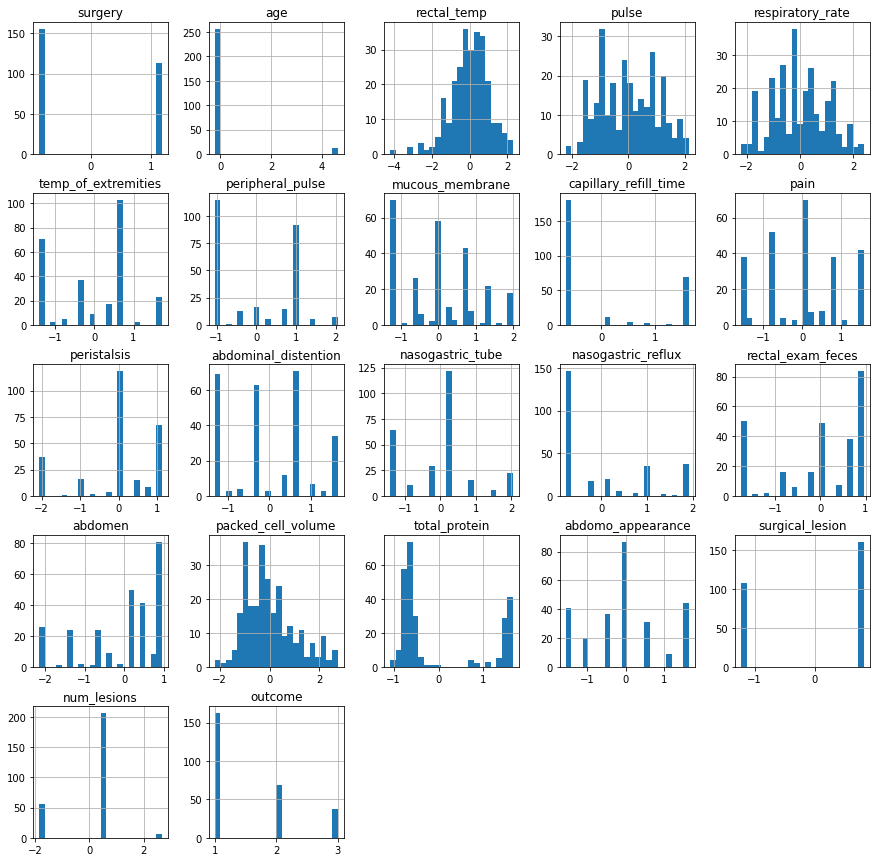

In [52]:
data.hist(bins=22, figsize=(15, 15))

In [53]:
#Skewness dealt with
print(data['pulse'].skew())
print(data['respiratory_rate'].skew())
print(data['total_protein'].skew())

0.12000589117640847
0.043238806211875036
0.8138304054265992


In [54]:
data.corr()['outcome']['total_protein'] #~~ No correlation!

-0.03365132607430619

In [55]:
data.drop(columns=['total_protein'], axis = 1, inplace = True)

data cleaning, outlier elimination, and feature selection completed

# Applying ML methods to predict outcome

In [56]:
data.head()

,surgery,age,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,...,abdominal_distention,nasogastric_tube,nasogastric_reflux,rectal_exam_feces,abdomen,packed_cell_volume,abdomo_appearance,surgical_lesion,num_lesions,outcome
0,1.174960,-0.216085,0.594129,0.138778,0.260593,0.685160,1.014665,0.899327,1.636214,1.590411,...,1.649829,2.059928,1.312422,0.060668,0.961463,-0.112851,-1.027934,-1.220959,0.419916,2.0
1,-0.851093,-0.216085,1.678886,0.951081,-0.598821,-0.356128,0.670906,0.681186,-0.662176,0.013677,...,-0.331439,0.322873,-0.776581,0.967325,-1.370903,0.360981,0.037632,-1.220959,0.419916,3.0
2,1.174960,-0.216085,0.284199,-1.434753,-0.144064,-1.397416,-1.047891,0.026761,-0.662176,0.013677,...,-1.322073,0.322873,-0.776581,-1.752645,-2.148358,-1.250047,0.037632,-1.220959,-1.839232,1.0
3,1.174960,-0.216085,-1.265453,1.384233,0.862055,1.032255,1.358425,1.990035,1.636214,0.539255,...,0.659195,-0.256146,1.013993,0.665106,0.184007,2.635373,0.037632,-1.220959,0.419916,2.0
4,1.174960,-0.216085,-0.232352,-0.792302,0.322894,-0.356128,-1.047891,0.026761,-0.662176,-0.774690,...,-0.331439,0.322873,-0.776581,0.060668,-0.593448,-1.092103,-1.027934,-1.220959,-1.839232,1.0


In [57]:
data.columns

Index(['surgery', 'age', 'rectal_temp', 'pulse', 'respiratory_rate',
       'temp_of_extremities', 'peripheral_pulse', 'mucous_membrane',
       'capillary_refill_time', 'pain', 'peristalsis', 'abdominal_distention',
       'nasogastric_tube', 'nasogastric_reflux', 'rectal_exam_feces',
       'abdomen', 'packed_cell_volume', 'abdomo_appearance', 'surgical_lesion',
       'num_lesions', 'outcome'],
      dtype='object')

In [58]:
Selected_features = ['temp_of_extremities', 'peripheral_pulse',
       'mucous_membrane', 'capillary_refill_time', 'pain', 'peristalsis',
       'abdominal_distention', 'nasogastric_tube', 'nasogastric_reflux', 
       'rectal_exam_feces', 'abdomen', 'abdomo_appearance', 'rectal_temp', 
       'pulse', 'respiratory_rate', 'packed_cell_volume']
X = data[Selected_features]
y = data['outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)

X_train = StandardScaler().fit_transform(X_train)

In [59]:
clf = LogisticRegression(random_state=0, solver='lbfgs', multi_class='ovr', max_iter=100000)
clf = clf.fit(X_train, y_train)
Y_pred = clf.predict(X_test)
log_regr_score1 = clf.score(X_test, y_test)
print('log_regr_score: ',log_regr_score1)
confusion_matrix(y_test, Y_pred)

log_regr_score:  0.7037037037037037


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


array([[31,  4,  0],
       [ 2,  6,  0],
       [ 5,  5,  1]])